In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [2]:
buenos_aires = 'https://academic.udayton.edu/kissock/http/weather/gsod95-current/AGBUENOS.txt'
quebec = 'https://academic.udayton.edu/kissock/http/weather/gsod95-current/CNQUEBEC.txt'
lima = 'https://academic.udayton.edu/kissock/http/weather/gsod95-current/PRLIMA.txt'
column_names = ["Month", "Day", "Year", "Temperature °F"]

In [3]:
df_buenos_aires = pd.read_csv(buenos_aires, delim_whitespace = True, names = column_names)
df_quebec = pd.read_csv(quebec, delim_whitespace = True, names = column_names)

### Creating auxiliary databases containing only data from 2010 from Havana and Osaka:

In [4]:
subdata_buenos_aires = df_buenos_aires[df_buenos_aires['Year'] == 2010]

In [5]:
subdata_quebec = df_quebec[df_quebec['Year'] == 2010]

In [6]:
buenos_aires_temperatures_in_f = []

for column in subdata_buenos_aires[['Temperature °F']]:
    buenos_aires_series = subdata_buenos_aires[column]
    buenos_aires_temperatures_in_f = buenos_aires_series.values

In [7]:
quebec_temperatures_in_f = []

for column in subdata_quebec[['Temperature °F']]:
    quebec_series = subdata_quebec[column]
    quebec_temperatures_in_f = quebec_series.values

### Lists of temperatures [°C]:

##### Temperature conversion equation: (°F - 32) x 5/9 =°C

In [8]:
buenos_aires_temperatures_in_c = []

for i in buenos_aires_temperatures_in_f:
    buenos_aires_temperatures_in_c.append((i - 32)* 5/9)

In [9]:
quebec_temperatures_in_c = []

for i in quebec_temperatures_in_f:
    quebec_temperatures_in_c.append((i - 32)* 5/9)

In [10]:
subdata_buenos_aires1 = subdata_buenos_aires.drop(['Temperature °F'], axis=1)
subdata_quebec1 = subdata_quebec.drop(['Temperature °F'], axis=1)

subdata_buenos_aires1['Temperature °C'] = buenos_aires_temperatures_in_c
subdata_quebec1['Temperature °C'] = quebec_temperatures_in_c

In [11]:
month_buenos_aires = []
day_buenos_aires = []
year = 2010
number_of_days_in_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
list_of_dates = []
list_of_dates_w_year = []



for i in subdata_buenos_aires1[['Month']]:
    for j in subdata_buenos_aires1[['Day']]:
        month_series = subdata_buenos_aires1[i]
        day_series = subdata_buenos_aires1[j]
        month_buenos_aires = month_series.values
        day_buenos_aires = day_series.values
        
        
        
        
for i in range(365):
    month = month_buenos_aires[i]
    day = day_buenos_aires[i]
    list_of_dates.append(dt.date(2010, month, day))
    

for i in list_of_dates:
    napis = str(int(i.day))+ "."+str(int(i.month)) 
    list_of_dates_w_year.append(napis)        

In [12]:
diff_list = []
for i in range(365):
    diff_list.append(buenos_aires_temperatures_in_c[i] - quebec_temperatures_in_c[i])    

In [13]:
max_value = 0
index_max = 0
index_min = 0
min_value = 0

for i in range(len(diff_list)):
    if (diff_list[i] > max_value):
        max_value = diff_list[i]
        index_max = i
    if(diff_list[i] < min_value):
        min_value = diff_list[i]
        index_min = i
print(max_value, index_max , '\n', min_value, index_min)

45.77777777777778 32 
 -21.666666666666668 196


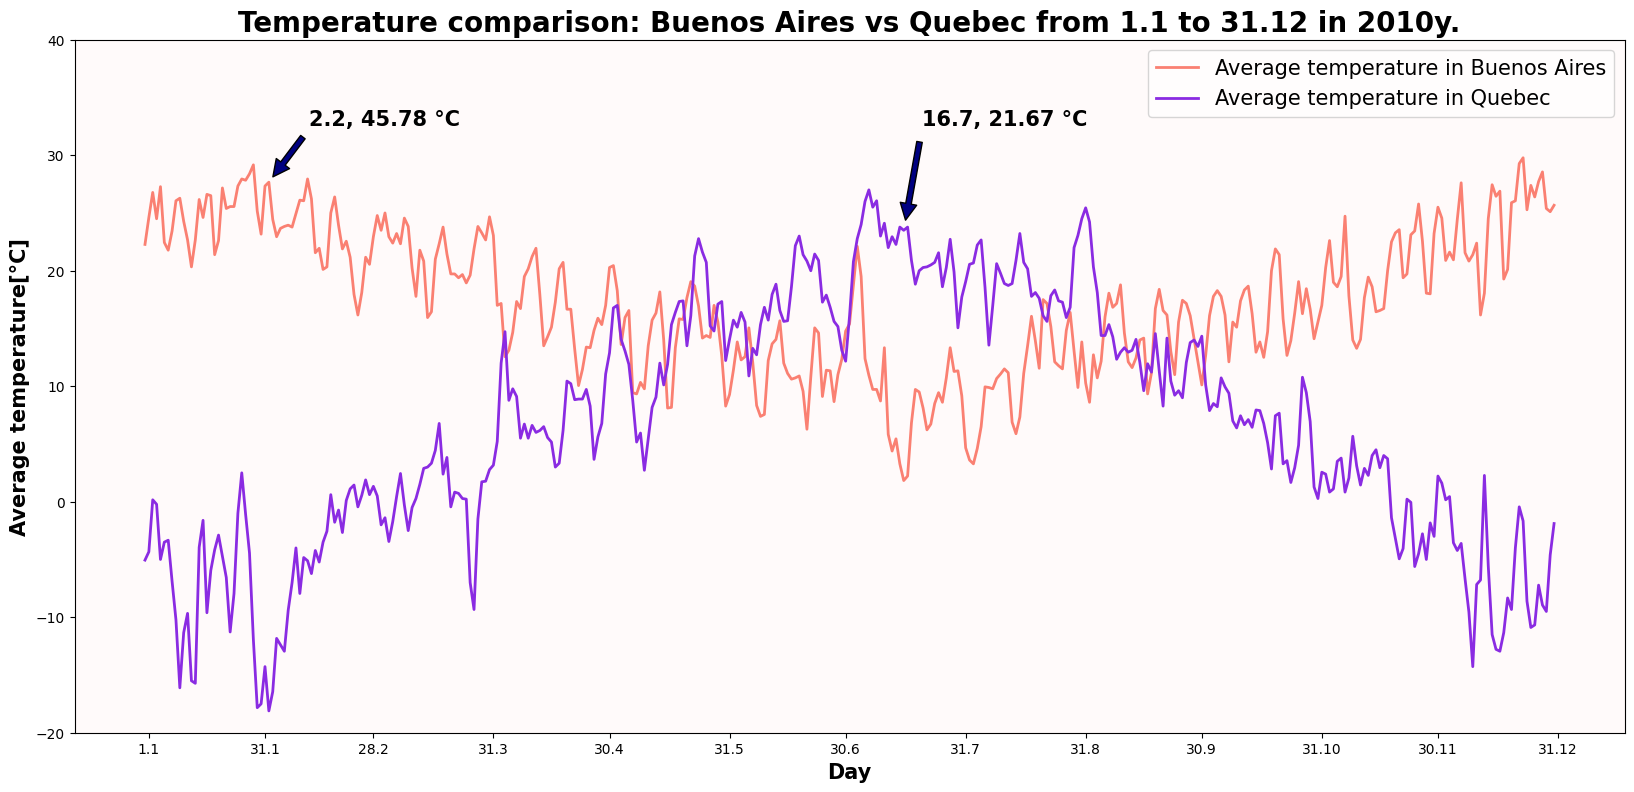

In [16]:
fig = plt.figure(figsize=(20, 9))
ax = plt.axes()
days = range(365)
x_ticks = [1,31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365]
x_labels = []
for i in x_ticks:
    x_labels.append(list_of_dates_w_year[i-1])

plt.xticks(ticks=x_ticks, labels=x_labels)
plt.ylim(-20, 40)


plt.annotate(f'{list_of_dates_w_year[index_max]}, {round(abs(max_value),2)} \N{DEGREE SIGN}C',
            xy=(index_max, buenos_aires_temperatures_in_c[index_max]),  xycoords='data',
            xytext=(0.2, 0.9), textcoords='axes fraction', fontsize=15, fontweight = 'bold',
            arrowprops=dict(facecolor='navy', shrink=0.1),
            horizontalalignment='center', verticalalignment='top')

plt.annotate(f'{list_of_dates_w_year[index_min]}, {round(abs(min_value),2)} \N{DEGREE SIGN}C', 
            xy=(index_min, quebec_temperatures_in_c[index_min]),  xycoords='data',
            xytext=(0.6, 0.9), textcoords='axes fraction', fontsize=15, fontweight = 'bold',
            arrowprops=dict(facecolor='navy', shrink=0.1),
            horizontalalignment='center', verticalalignment='top')

plt.xlabel("Day", fontsize = 15, fontweight = 'bold')
plt.ylabel("Average temperature[°C]", fontsize = 15, fontweight = 'bold')

ax.set_facecolor("ghostwhite")



plt.plot(days, buenos_aires_temperatures_in_c, label='Average temperature in Buenos Aires', color = 'salmon', linewidth=2)
plt.plot(days, quebec_temperatures_in_c, color = 'blueviolet', label='Average temperature in Quebec', linewidth=2)
plt.legend(prop={'size': 15})
ax.set_facecolor('snow')


plt.title('Temperature comparison: Buenos Aires vs Quebec from {} to {} in 2010y.'.format(list_of_dates_w_year[0], list_of_dates_w_year[364]),
         fontsize = 20, fontweight = 'bold')

#plt.savefig('cemperatures_comparison.pdf')

plt.show()